# QuantumDotDesigner Example Notebook

This notebook provides an example usage of the `QuantumDotDesigner` module. We'll walk through the creation, modification, and visualization of quantum dot components.

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pylab as plt
import QuantumDotDesigner as qdd


from QuantumDotDesigner.base import Layer
from QuantumDotDesigner.helpers.helpers import mirror_points_along_path as mirror

After importing the QuantumDotDesigner module, we have access to various elements and components. You can see all available elements by running the following cell.

In [3]:
elements = [attr for attr in dir(qdd.elements) if not attr.startswith('__')]

elements

['ArbitraryPolygon',
 'Barrier',
 'BasicPolygon',
 'ClavierGate',
 'FanOutLineBase',
 'FanOutLineCoarse',
 'FanOutLineFine',
 'Ohmic',
 'Plunger',
 'ScreeningGate']

The same also applies to components. Components are unit cells containing several elements in a certain configuration.

In [4]:
components = [attr for attr in dir(qdd.components) if not attr.startswith('__')]

components

['Clavier', 'FanOutLine', 'Sensor']

In [5]:
# %% import

from QuantumDotDesigner.elements import Plunger, Barrier, ScreeningGate, BasicPolygon
from QuantumDotDesigner.components import Sensor, FanOutLine

Importing all required elements and components seperately, saves us some time and space when writing the code. Now calling Plunger is the same like calling qdd.elements.Plunger.

In [6]:
qdd.elements.Plunger == Plunger

True

## Main cell

The QuantumDotArray instance represents the main cell of the design, where all elements, components, unit cells, and fanout has to be added eventually.

In [7]:
qda = qdd.QuantumDotArray()

## Collection

Before we start defining any elements, we first have to initiliase a collection, in which all elements and components are stored.

In [8]:
collection = qdd.BaseCollection()

## Layers

After defining the collection we can create layer sets consisting of a fine and coarse layer.

In [9]:
# %% Layers

ohmic_layer = Layer('ohmic_layer', collection)
ohmic_layer.fine = 3
ohmic_layer.coarse = 4

barrier_layer = Layer('barrier_layer', collection)
barrier_layer.fine = 5
barrier_layer.coarse = 6

screening_layer = Layer('screening_layer', collection, 3, 4)
screening_layer.fine = 31
screening_layer.coarse = 32

barrier_source_layer = barrier_layer.copy('barrier_source_layer', collection)
barrier_drain_layer = barrier_layer.copy('barrier_drain_layer', collection)
barrier_sep_layer = screening_layer.copy('barrier_screening_layer', collection)

plunger_layer = Layer('plunger_layer', collection)
plunger_layer.fine = 21
plunger_layer.coarse = 22
plunger_layer.via_etch = 23
plunger_layer.via_fine = 24
plunger_layer.via_coarse = 25

## Elements/Components Definition

Next, we will define various elements such as plungers, barriers, and sensors.


### define plungers

In [10]:
# %%% define plungers

pl = Plunger('plunger', collection)
pl.diameter = 150e-3
pl.layer = plunger_layer

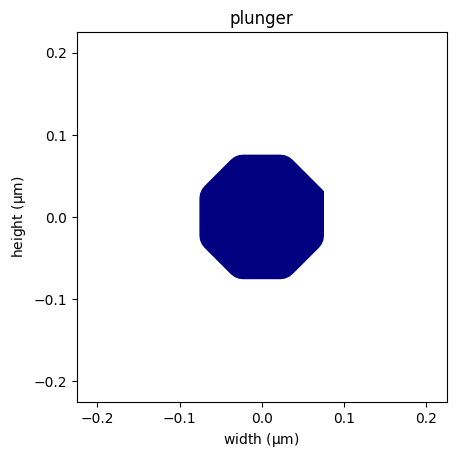

In [11]:
pl.build()
pl.plot()

### define barriers

In [12]:
# %%% define barriers

bar_0deg = Barrier('barrier_0deg_rotated', collection)
bar_0deg.width = 40e-3
bar_0deg.length = 70e-3
bar_0deg.layer = barrier_layer
bar_0deg.rotate = 0/2*np.pi

bar_90deg = bar_0deg.copy('barrier_90deg_rotated', collection)
bar_90deg.rotate = 1/2*np.pi

bar_180deg = bar_0deg.copy('barrier_180deg_rotated', collection)
bar_180deg.rotate = 2/2*np.pi

bar_270deg = bar_0deg.copy('barrier_270deg_rotated', collection)
bar_270deg.rotate = 3/2*np.pi

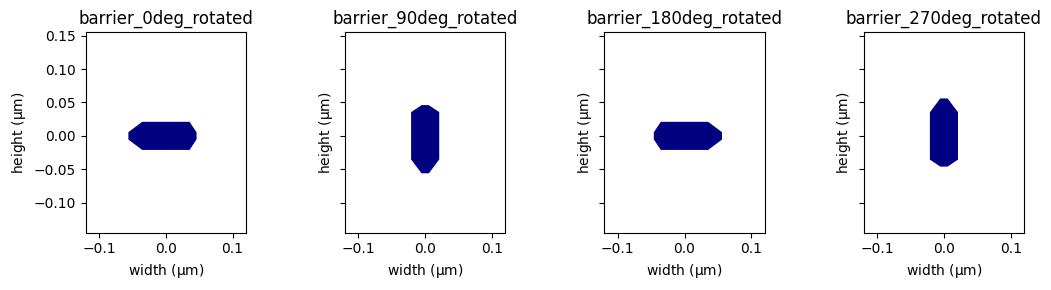

In [13]:
fig, axs = plt.subplots(1,4, figsize=(11, 3), sharex=True, sharey=True)

bar_0deg.build()
bar_0deg.plot(ax=axs[0])

bar_90deg.build()
bar_90deg.plot(ax=axs[1])

bar_180deg.build()
bar_180deg.plot(ax=axs[2])

bar_270deg.build()
bar_270deg.plot(ax=axs[3])

plt.tight_layout()

### define sensor

In [14]:
# %%% define sensor

spacing_sep = 60e-3

sensor_top = Sensor('sensor_top', collection)

# for the positioning of the sensor element you can either indicate 'top',
# 'bottom', 'top-right', etc ...., or you indiacte the angle with 'top'
# corresponding to 0, 'top-right' corresponding to np.pi/4, etc ...
sensor_top.sep_pos = 'bottom-right'
# sensor_top.sep_pos_angle = 1/8*np.pi
sensor_top.source_pos = 'top-right'
# sensor_top.source_pos_angle = 3/8*np.pi
sensor_top.drain_pos = 'bottom-left'  # 1/8*np.pi
# sensor_top.drain_pos_angle = -3/8*np.pi

# the orientation of the sensor elements is indicated by the direction in
# which the end of the element points to, This can be either clockwise or
# counterclockwise
sensor_top.barrier_orientation['drain'] = 'counterclockwise'
sensor_top.barrier_orientation['source'] = 'clockwise'
sensor_top.barrier_orientation['sep'] = 'clockwise'

sensor_top.gap_sep = 60e-3
sensor_top.gap_ohmic_pl = 50e-3

sensor_top.plunger.diameter = 160e-3
sensor_top.plunger.layer = plunger_layer

sensor_top.barrier_source.width = 40e-3
sensor_top.barrier_source.length = 70e-3
sensor_top.barrier_source.layer = barrier_source_layer

sensor_top.barrier_drain.width = 40e-3
sensor_top.barrier_drain.length = 70e-3
sensor_top.barrier_drain.layer = barrier_drain_layer

sensor_top.barrier_sep.width = 50e-3
sensor_top.barrier_sep.length = 60e-3
sensor_top.barrier_sep.layer = screening_layer

sensor_top.source.layer = ohmic_layer
sensor_top.source.contact_length = 70e-3
sensor_top.drain.layer = ohmic_layer
sensor_top.drain.contact_length = 70e-3

sensor_bottom = sensor_top.copy('sensor_bottom', collection)
sensor_bottom.sep_pos = 'top-left'
sensor_bottom.source_pos = 'bottom-left'
sensor_bottom.drain_pos = 'top-right'

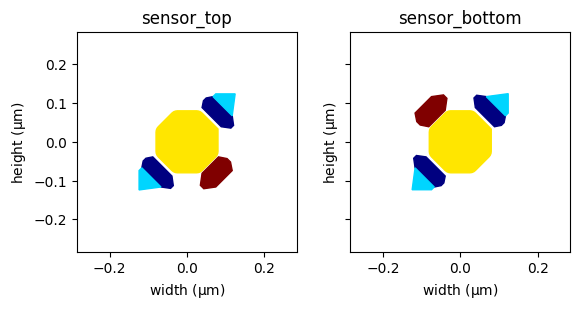

In [15]:
fig, axs = plt.subplots(1,2, figsize=(6, 3), sharex=True, sharey=True)

sensor_top.build()
sensor_top.plot(ax=axs[0])

sensor_bottom.build()
sensor_bottom.plot(ax=axs[1])

plt.tight_layout()

## Unit cell

Unit cells are instances to which we can add elements and components. Each component that we add can be placed on a sublattice with attributes center, rows, columns, and spacing. The same element or component can be added multiple times, such that all patterns can be created.

In [16]:
# %% Unit cell

unit_cell = qdd.UnitCell('unit_cell')

spacing_qd = 200e-3

#### add plungers

In [17]:
# %%% add plunger
uc_pl = unit_cell.add_component()

uc_pl.component = pl
uc_pl.center = (0, 0)
uc_pl.rows = 2
uc_pl.columns = 2
uc_pl.spacing = (spacing_qd, spacing_qd)

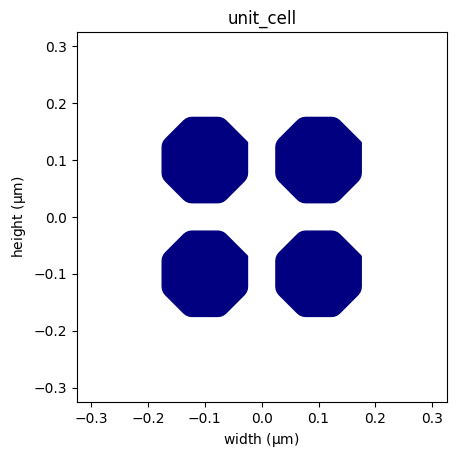

In [18]:
unit_cell.build()
unit_cell.plot()

#### add barriers

In [19]:
uc_bar_0deg = unit_cell.add_component()
uc_bar_90deg = unit_cell.add_component()
uc_bar_180deg = unit_cell.add_component()
uc_bar_270deg = unit_cell.add_component()

In [20]:
# %%% add barriers

uc_bar_0deg.component = bar_0deg
uc_bar_0deg.center = (spacing_qd/2, 0)

uc_bar_90deg.component = bar_90deg
uc_bar_90deg.center = (0, spacing_qd/2)

uc_bar_180deg.component = bar_180deg
uc_bar_180deg.center = (-spacing_qd/2, 0)

uc_bar_270deg.component = bar_270deg
uc_bar_270deg.center = (0, -spacing_qd/2)

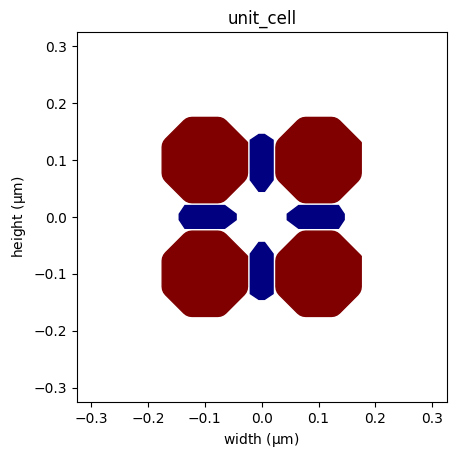

In [21]:
unit_cell.build()
unit_cell.plot()

#### add sensors

In [22]:
# %%% add sensor

sensor_pos_uniy = (spacing_qd/2 +
                   2**0.5/2*(pl.diameter/2 * pl.asymy +
                             sensor_top.gap_sep +
                             sensor_top.plunger.diameter/2 *
                             sensor_top.plunger.asymy))

sensor_pos_unix = (spacing_qd/2 +
                   2**0.5/2*(pl.diameter/2 * pl.asymx +
                             sensor_top.gap_sep +
                             sensor_top.plunger.diameter/2 *
                             sensor_top.plunger.asymx))

uc_st = unit_cell.add_component()
uc_st.component = sensor_top
uc_st.center = (-sensor_pos_unix, sensor_pos_uniy)

uc_sb = unit_cell.add_component()
uc_sb.component = sensor_bottom
uc_sb.center = (sensor_pos_unix, -sensor_pos_uniy)

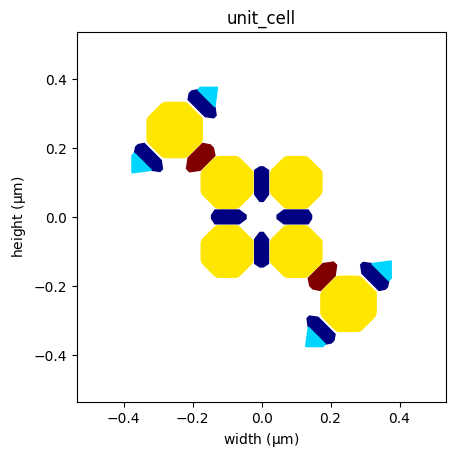

In [23]:
unit_cell.build()
unit_cell.plot()

### add to main cell

When adding the unit cell to the main cell, we could place it on a sublattice again. But here, we are creating only a single one centered at (0,0), i.e. we do not have to specific anything further.

In [24]:
# %% Main cell

qda = qdd.QuantumDotArray()

In [25]:
# %%% add unit cell

uc_unitcell = qda.add_component()
uc_unitcell.component = unit_cell

## Fanout

The Fanout object collects all FanOutLine object that we create, and can be added to the QuantumDotArray object later.

In [26]:
fo = qdd.Fanout('fanout')

### Fanout Points

For the fanout we have to start by creating the fanout points with the FanoutPoints class. This class calculates the coarse fanout, by taking into account the number of lines at each side of the chip.

In [27]:
fo_points = qdd.FanoutPoints(qda)

First the number of bondpads for each side of the chip has to be set.

In [28]:
fo_points.fanout_counts = {'top': 6, 'bottom': 6, 'left': 7, 'right': 7}

Then we can set the point at which the coarse fanout starts, calculated from the center. Here, we set it to 16 micrometer for x- and y-direction. At the start, the spacing between the lines is set to 2 microemeters, the width to 1 micrometer.

In [29]:
fo_points.fo_stages[0] = (16, 16)
fo_points.fo_widths[0] = 1 
fo_points.spacings[0] = 2

For the bondpads the spacing can be set likewise, and the bondpad size can be set individually for all four sides of the chip.

In [30]:
fo_points.spacings[-1] = 250

fo_points.bondpad_size = {'top': (110, 400), 'bottom': (110, 400),
                          'left': (400, 110), 'right': (400, 110)}

Evenetually, we have to create the coarse fanout points. Then it can be used to create fanout lines.

In [31]:
fo_points.create_fo_polygons_coarse()

### Fanout plunger

For the creation of fanout lines, we have to give four arguments. The first argument is the name of the element that we want to fanout. We can access the names of all our elements in the collection.

In [32]:
collection.elements.keys()

dict_keys(['barrier_source_layer', 'barrier_drain_layer', 'barrier_screening_layer', 'plunger', 'barrier_0deg_rotated', 'barrier_90deg_rotated', 'barrier_180deg_rotated', 'barrier_270deg_rotated', 'sensor_top_plunger', 'sensor_top_barrier_source', 'sensor_top_barrier_drain', 'sensor_top_source', 'sensor_top_drain', 'sensor_top_barrier_seperation', 'sensor_bottom_plunger', 'sensor_bottom_barrier_source', 'sensor_bottom_barrier_drain', 'sensor_bottom_source', 'sensor_bottom_drain', 'sensor_bottom_barrier_seperation'])

The second argument is the element number that we want to fanout. In this design, we have created 4 plunger elements placed on a 2x2 lattice. We count the element number from top-left to bottom-right, just like reading a book. Hence, element number 0 is top-left, element number 1 is top-right, element number 2 is bottom-left, and element number 3 is bottom-right.

The third and forth argument is the Collection class instance, and the FanoutPoints class instance.

#### Fanout plunger 0

In [33]:
fo_pl_0 = FanOutLine('plunger', 0, collection, fo_points)

After initialising the FanOutLine object successfully, the fanout direction and the fanout line number can be changed. The fanout line number is always counted from left to right, and top to bottom.

In [34]:
fo_pl_0.fo_direction = 'left'
fo_pl_0.n_fanout = 4

The fine fanout from the element to the coarse fanout can be modified with the fo_line_fine.points_along_path attribute. It constitutes a list, where each entry corresponds to a point, and a note. The note can be 'abs', 'start', 'prev', and 'dif', and determines how the given point is interpreted. 'abs' corresponds to an absolute coordinate, 'start' to a relative coordinate from the element position, 'prev' to a relative coordinate from the previous point, and 'dif' to a ratio between the start and end point.

For Germanium devices it is important that the ohmic bondpads are placed off the SiN strip that avoids shorts to the 2DHG for regular gates. For the ohmics this has led to background currents in the past, and therefore they are placed by default off the SiN pad. This can be changed by using the *bondpad_off* attribute of the corresponding element. When placing any gate off the regular bondpad strip that we define in **FanoutPoints**, we have to define additional parameters for the **FanOutLine**, such as:

- *bondpad_off* = True
- *bp_ohmic_position*
- *bp_ohmic_width_out*
- *bp_ohmic_width_in*
- *bp_ohmic_length*
- *bp_ohmic_shift*

Here, we are keeping the ohmic bondpad parameters the same for our ohmic bondpads, such that we can define some global variables:

In [35]:
# %%% Ohmic fanout parameters

bp_ohmic_position = 1000
bp_ohmic_width_out = 110
bp_ohmic_width_in = 80
bp_ohmic_length = 400

bp_shift_top_source = 50
bp_shift_top_drain = 100
bp_shift_bottom_source = 50
bp_shift_bottom_drain = 100

### Fanout plunger

In [36]:
# %%%% Fanout plunger ver 0
fo_pl_0 = FanOutLine('plunger', 0, collection, fo_points)

fo_pl_0.fo_direction = 'left'
fo_pl_0.n_fanout = 4

fo_pl_0.fo_line_fine.fo_width_start = 40e-3
fo_pl_0.fo_line_fine.points_along_path = [[-0.05, -0.01, 'start'],
                                          [-0.4, -0.1, 'prev']
                                          ]

fo.add_component(fo_pl_0)

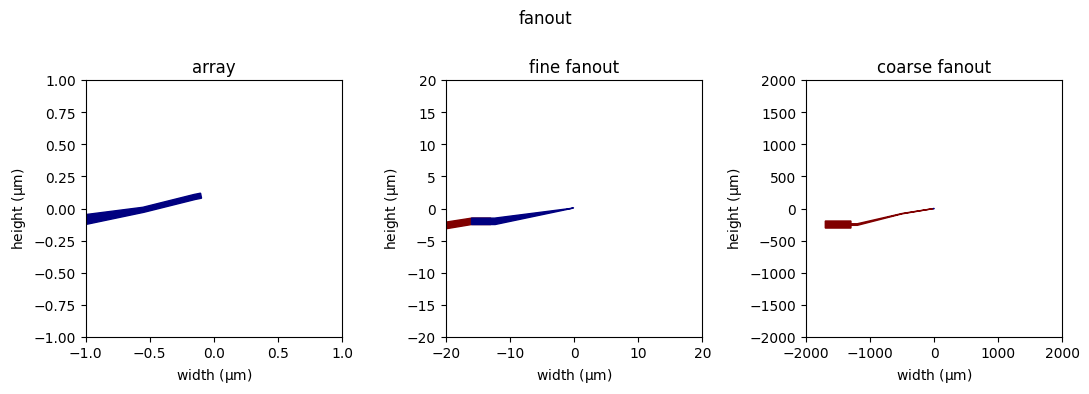

In [37]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [38]:
# %%%% Fanout plunger ver 1
fo_pl_1 = FanOutLine('plunger', 1, collection, fo_points)

fo_pl_1.fo_direction = 'right'
fo_pl_1.n_fanout = 0

fo_pl_1.fo_line_fine.fo_width_start = 40e-3
fo_pl_1.fo_line_fine.points_along_path = [[0.6, 0.6, 'start']
                                          ]

fo.add_component(fo_pl_1)

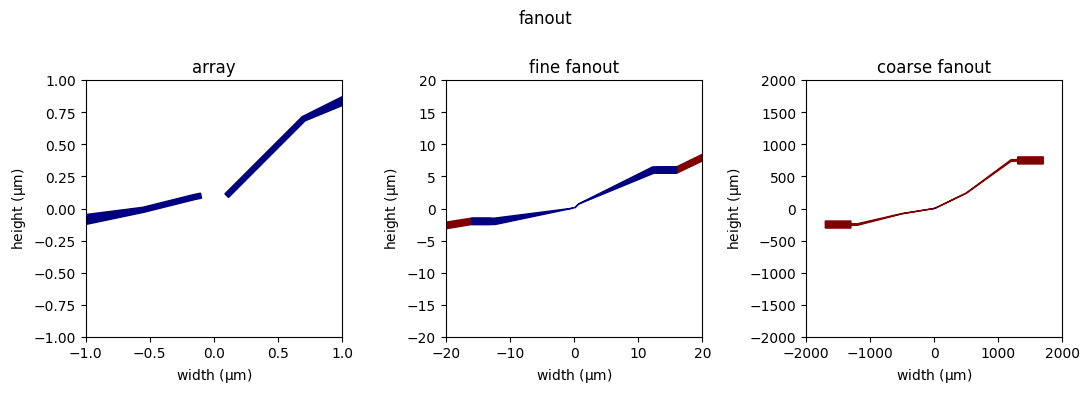

In [39]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [40]:
# %%%% Fanout plunger ver 2
fo_pl_2 = FanOutLine('plunger', 2, collection, fo_points)

fo_pl_2.fo_direction = 'left'
fo_pl_2.n_fanout = -1

fo_pl_2.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_pl_1.fo_line_fine.points_along_path)
fo_pl_2.fo_line_fine.points_along_path = points

fo.add_component(fo_pl_2)

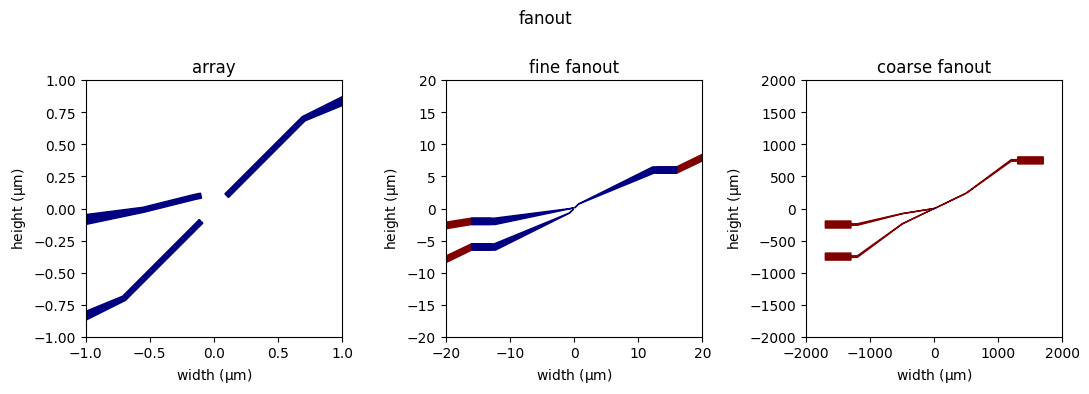

In [41]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [42]:
# %%%% Fanout plunger ver 3
fo_pl_3 = FanOutLine('plunger', 3, collection, fo_points)

fo_pl_3.fo_direction = 'right'
fo_pl_3.n_fanout = 2

fo_pl_3.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_pl_0.fo_line_fine.points_along_path)
fo_pl_3.fo_line_fine.points_along_path = points

fo.add_component(fo_pl_3)

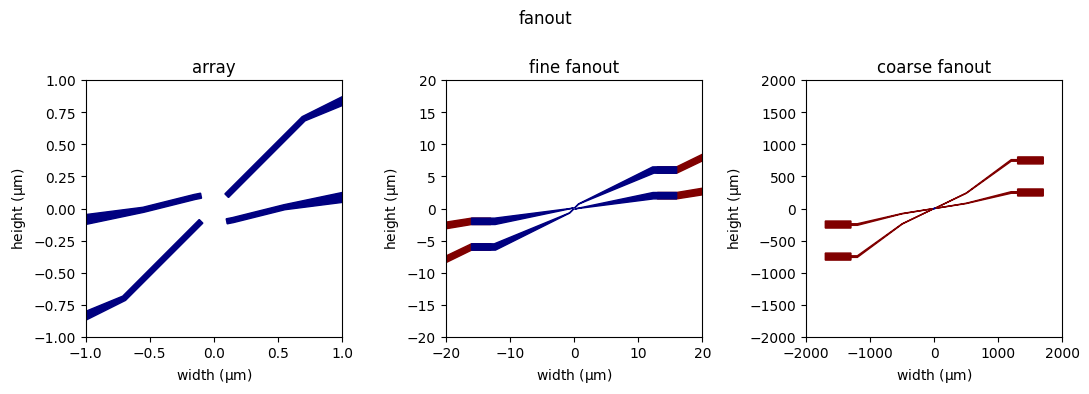

In [43]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

### Fanout barriers

In [44]:
# %%%% Fanout bar 0deg 0
fo_bar_0deg_0 = FanOutLine('barrier_0deg_rotated', 0, collection, fo_points)

fo_bar_0deg_0.fo_direction = 'right'
fo_bar_0deg_0.n_fanout = 1

fo_bar_0deg_0.fo_line_fine.fo_width_start = 40e-3
fo_bar_0deg_0.fo_line_fine.points_along_path = [[0.1, 0, 'start'],
                                                [0.1, 0.03, 'prev'],
                                                [0.2, 0.1, 'prev']
                                                ]

fo.add_component(fo_bar_0deg_0)

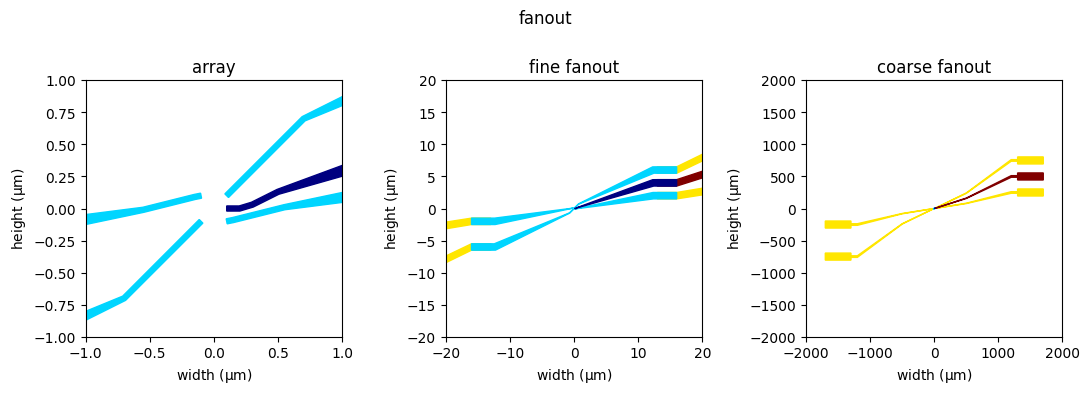

In [45]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [46]:
# %%%% Fanout bar 90deg 0
fo_bar_90deg_0 = FanOutLine('barrier_90deg_rotated', 0, collection, fo_points)

fo_bar_90deg_0.fo_direction = 'top'
fo_bar_90deg_0.n_fanout = 4

fo_bar_90deg_0.fo_line_fine.fo_width_start = 40e-3
fo_bar_90deg_0.fo_line_fine.points_along_path = [[0, 0.1, 'start'],
                                                 [0.03, 0.1, 'prev'],
                                                 [0.1, 0.2, 'prev']
                                                 ]

fo.add_component(fo_bar_90deg_0)

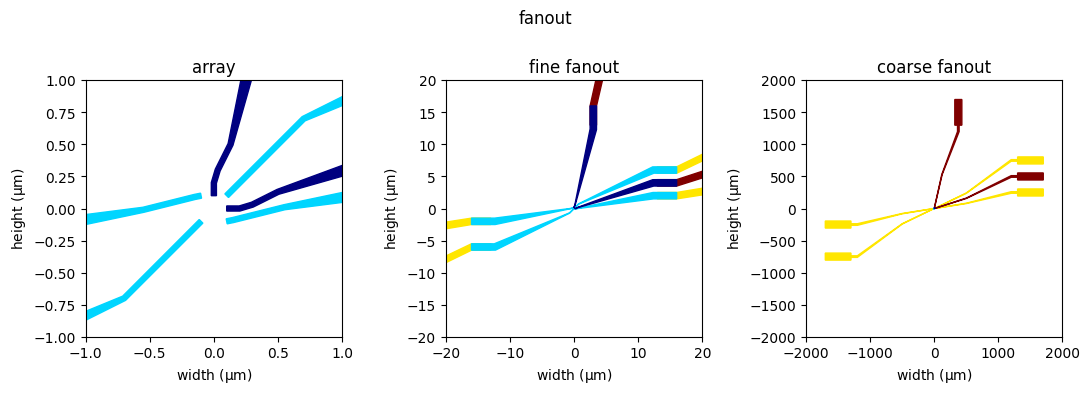

In [47]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [48]:
# %%%% Fanout bar 180deg 0
fo_bar_180deg_0 = FanOutLine(
    'barrier_180deg_rotated', 0, collection, fo_points)

fo_bar_180deg_0.fo_direction = 'left'
fo_bar_180deg_0.n_fanout = 5

fo_bar_180deg_0.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_bar_0deg_0.fo_line_fine.points_along_path)
fo_bar_180deg_0.fo_line_fine.points_along_path = points

fo.add_component(fo_bar_180deg_0)

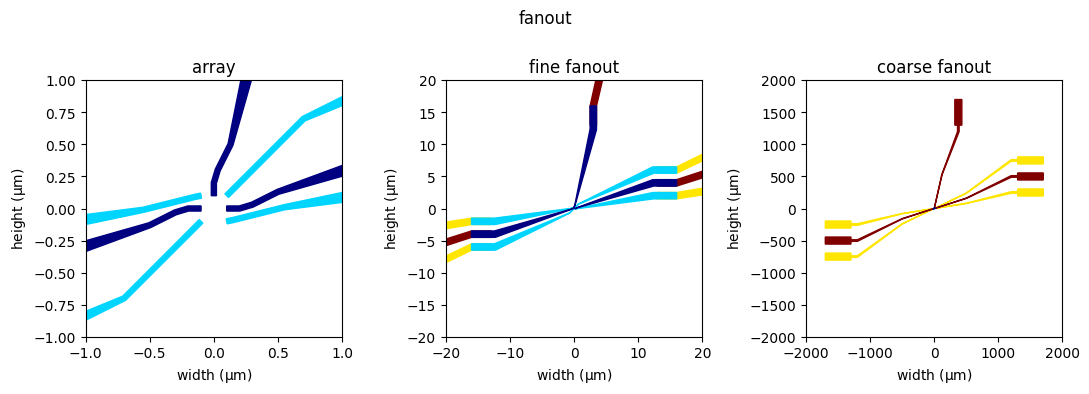

In [49]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [50]:
# %%%% Fanout bar 270deg 0
fo_bar_270deg_0 = FanOutLine(
    'barrier_270deg_rotated', 0, collection, fo_points)

fo_bar_270deg_0.fo_direction = 'bottom'
fo_bar_270deg_0.n_fanout = 1

fo_bar_270deg_0.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_bar_90deg_0.fo_line_fine.points_along_path)
fo_bar_270deg_0.fo_line_fine.points_along_path = points

fo.add_component(fo_bar_270deg_0)

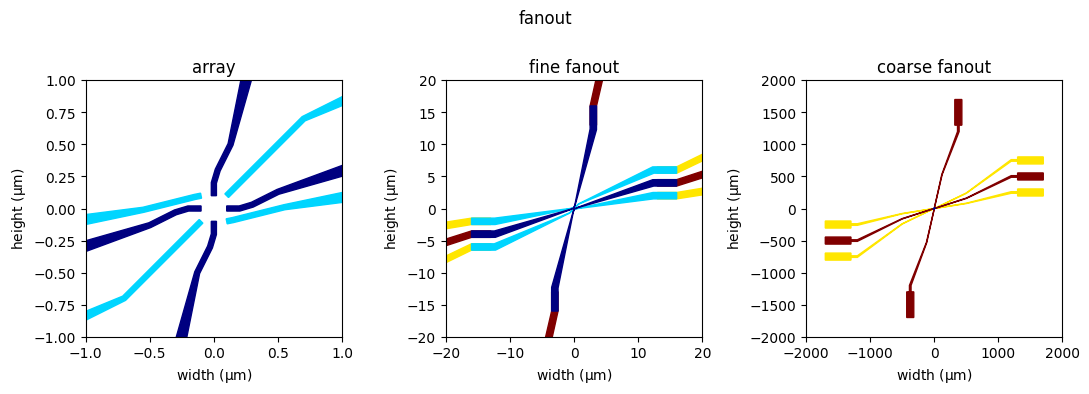

In [51]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

### Fanout sensor top

In [52]:
# %%%% Fanout sensor plunger top
fo_sens_pl_top = FanOutLine('sensor_top_plunger', 0, collection, fo_points)

fo_sens_pl_top.fo_direction = 'left'
fo_sens_pl_top.n_fanout = 0

fo_sens_pl_top.fo_line_fine.fo_width_start = 40e-3
fo_sens_pl_top.fo_line_fine.points_along_path = [[-0.5, 0.5, 'start', 40e-3]
                                                 ]

fo.add_component(fo_sens_pl_top)

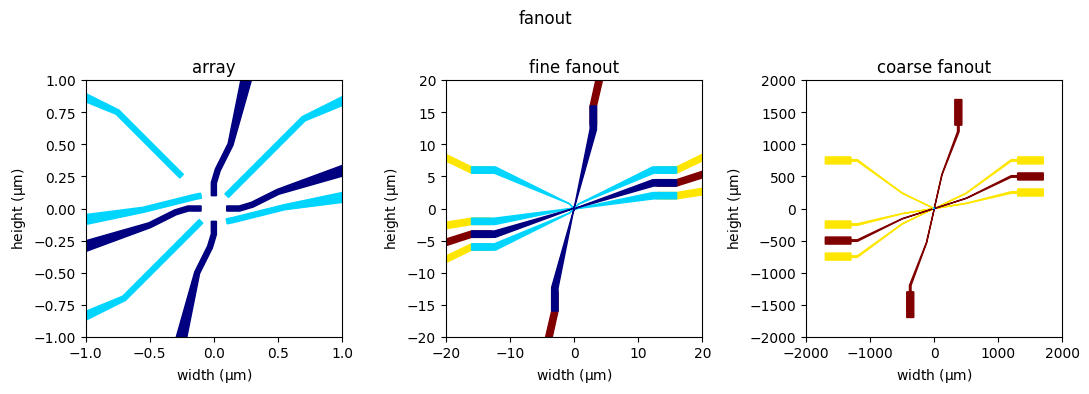

In [53]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [54]:
# %%%% Fanout sensor source top
fo_sens_top_source = FanOutLine(
    'sensor_top_source', 0, collection, fo_points)

fo_sens_top_source.fo_direction = 'top'
fo_sens_top_source.n_fanout = 2

fo_sens_top_source.bp_ohmic_position = bp_ohmic_position
fo_sens_top_source.bp_ohmic_width_out = bp_ohmic_width_out
fo_sens_top_source.bp_ohmic_width_in = bp_ohmic_width_in
fo_sens_top_source.bp_ohmic_length = bp_ohmic_length
fo_sens_top_source.bp_ohmic_shift = bp_shift_top_source

fo_sens_top_source.fo_line_fine.points_along_path = [[0, 0.4, 'start'],
                                                     [-0.04, 0.4, 'prev']
                                                     ]

fo.add_component(fo_sens_top_source)

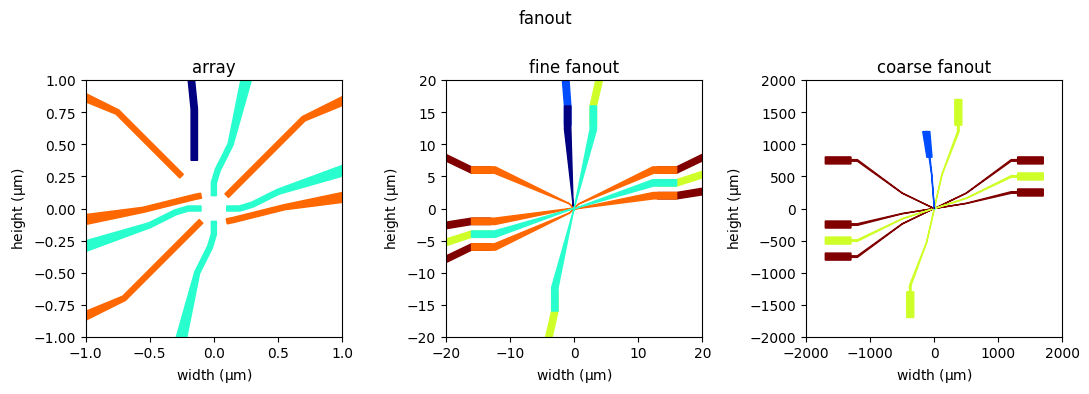

In [55]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [56]:
# %%%% Fanout sensor drain top
fo_sens_top_drain = FanOutLine(
    'sensor_top_drain', 0, collection, fo_points)

fo_sens_top_drain.fo_direction = 'left'
fo_sens_top_drain.n_fanout = 2

fo_sens_top_drain.bp_ohmic_position = bp_ohmic_position
fo_sens_top_drain.bp_ohmic_width_out = bp_ohmic_width_out
fo_sens_top_drain.bp_ohmic_width_in = bp_ohmic_width_in
fo_sens_top_drain.bp_ohmic_length = bp_ohmic_length
fo_sens_top_drain.bp_ohmic_shift = bp_shift_top_drain

fo_sens_top_drain.fo_line_fine.points_along_path = [[-0.25, -0.01, 'start']
                                                    ]

fo.add_component(fo_sens_top_drain)

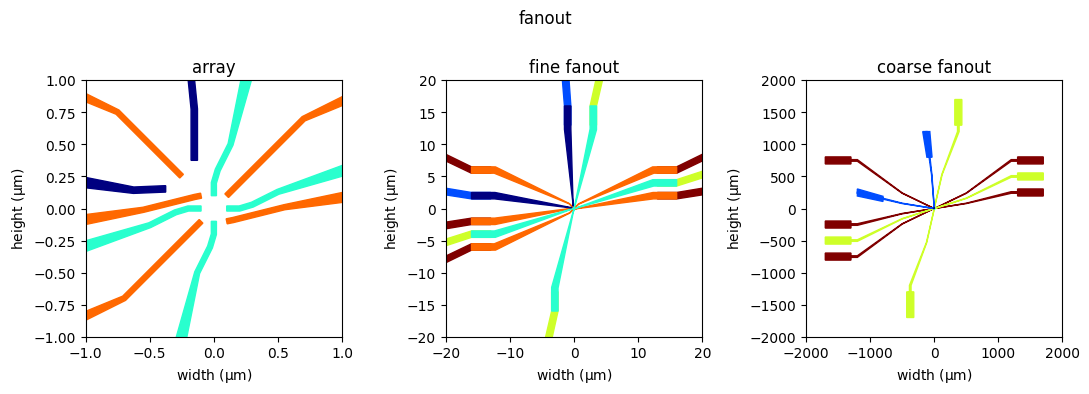

In [57]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [58]:
# %%%% Fanout sensor source barrier top
fo_sens_top_bar_source = FanOutLine(
    'sensor_top_barrier_source', 0, collection, fo_points)

fo_sens_top_bar_source.fo_direction = 'top'
fo_sens_top_bar_source.n_fanout = 1

fo_sens_top_bar_source.fo_line_fine.points_along_path = [[-0.1, 0.1, 'start'],
                                                         [-0.1, 0.2, 'prev']
                                                         ]

fo.add_component(fo_sens_top_bar_source)

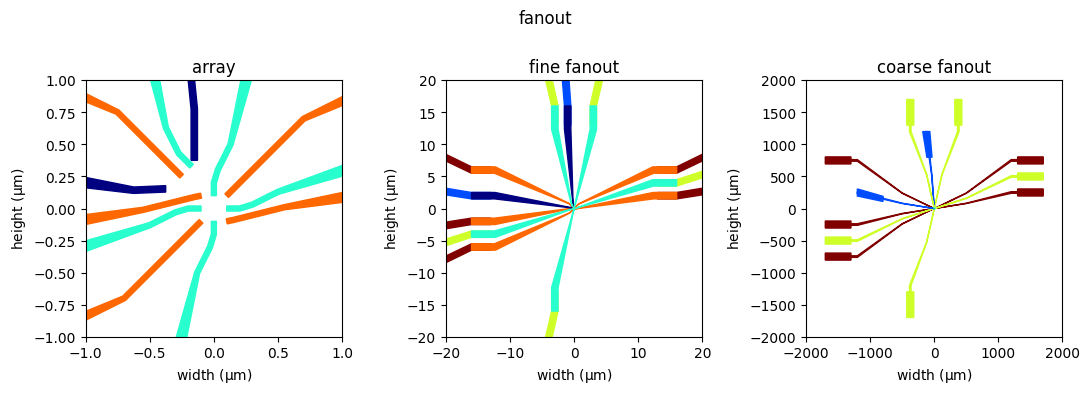

In [59]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [60]:
# %%%% Fanout sensor drain barrier top
fo_sens_top_bar_drain = FanOutLine(
    'sensor_top_barrier_drain', 0, collection, fo_points)

fo_sens_top_bar_drain.fo_direction = 'left'
fo_sens_top_bar_drain.n_fanout = 1

fo_sens_top_bar_drain.fo_line_fine.points_along_path = [[-0.1, 0.1, 'start'],
                                                        [-0.2, 0.1, 'prev']
                                                        ]

fo.add_component(fo_sens_top_bar_drain)

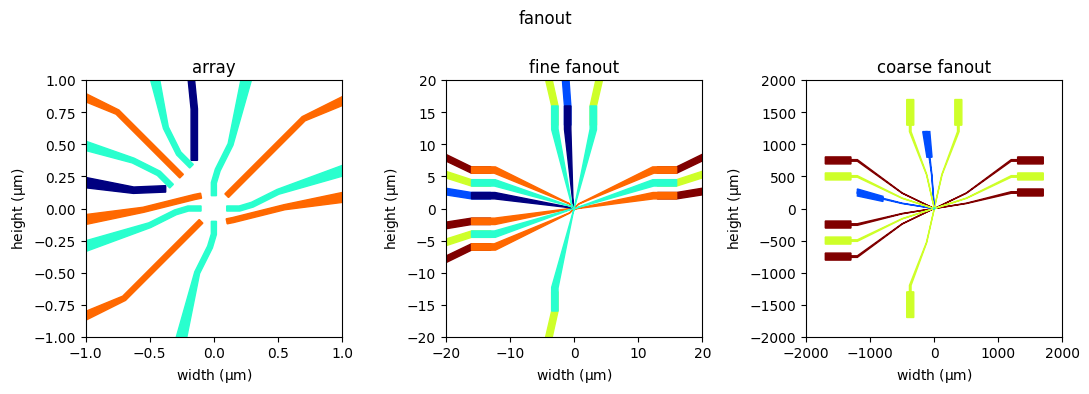

In [61]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [62]:
# %%%% Fanout sensor sep barrier top
fo_sens_top_bar_sep = FanOutLine(
    'sensor_top_barrier_seperation', 0, collection, fo_points)

fo_sens_top_bar_sep.fo_direction = 'top'
fo_sens_top_bar_sep.n_fanout = 3

fo_sens_top_bar_sep.fo_line_fine.points_along_path = [[0.1, 0.1, 'start'],
                                                      [0.1, 0.2, 'prev'],
                                                      [0, 0.3, 'prev']
                                                      ]

fo.add_component(fo_sens_top_bar_sep)

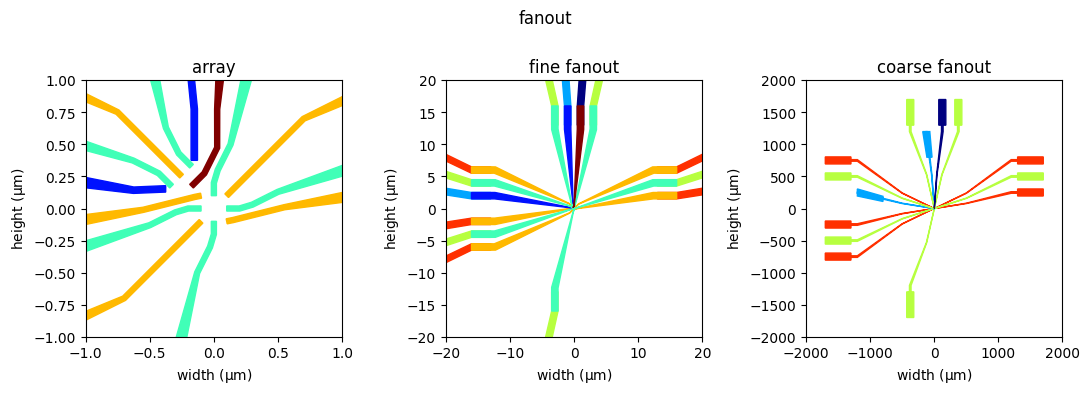

In [63]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

### Fanout sensor bottom

In [64]:
# %%%% Fanout sensor plunger bottom
fo_sens_pl_bottom = FanOutLine(
    'sensor_bottom_plunger', 0, collection, fo_points)

fo_sens_pl_bottom.fo_direction = 'right'
fo_sens_pl_bottom.n_fanout = -1

fo_sens_pl_bottom.fo_line_fine.fo_width_start = 40e-3
points = mirror(fo_sens_pl_top.fo_line_fine.points_along_path)
fo_sens_pl_bottom.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_pl_bottom)

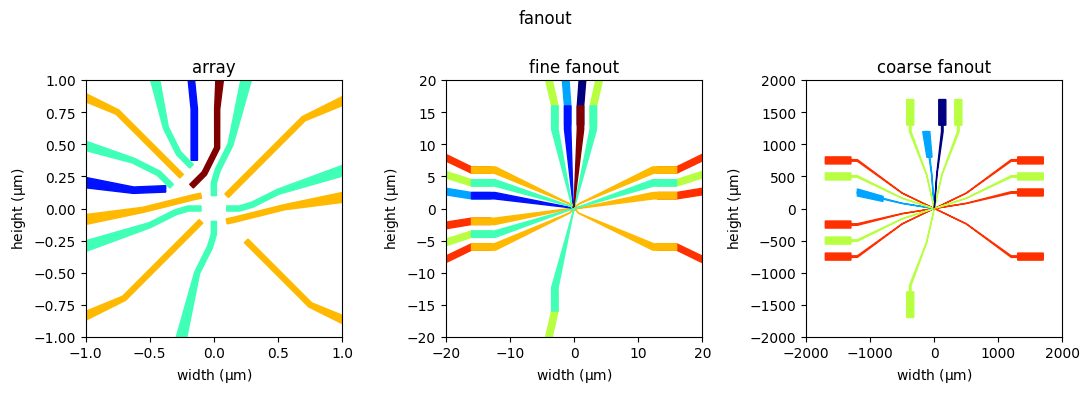

In [65]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [66]:
# %%%% Fanout sensor source bottom
fo_sens_bottom_source = FanOutLine(
    'sensor_bottom_source', 0, collection, fo_points)

fo_sens_bottom_source.fo_direction = 'bottom'
fo_sens_bottom_source.n_fanout = 3

fo_sens_bottom_source.bp_ohmic_position = bp_ohmic_position
fo_sens_bottom_source.bp_ohmic_width_out = bp_ohmic_width_out
fo_sens_bottom_source.bp_ohmic_width_in = bp_ohmic_width_in
fo_sens_bottom_source.bp_ohmic_length = bp_ohmic_length
fo_sens_bottom_source.bp_ohmic_shift = bp_shift_bottom_source

points = mirror(fo_sens_top_source.fo_line_fine.points_along_path)
fo_sens_bottom_source.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_source)

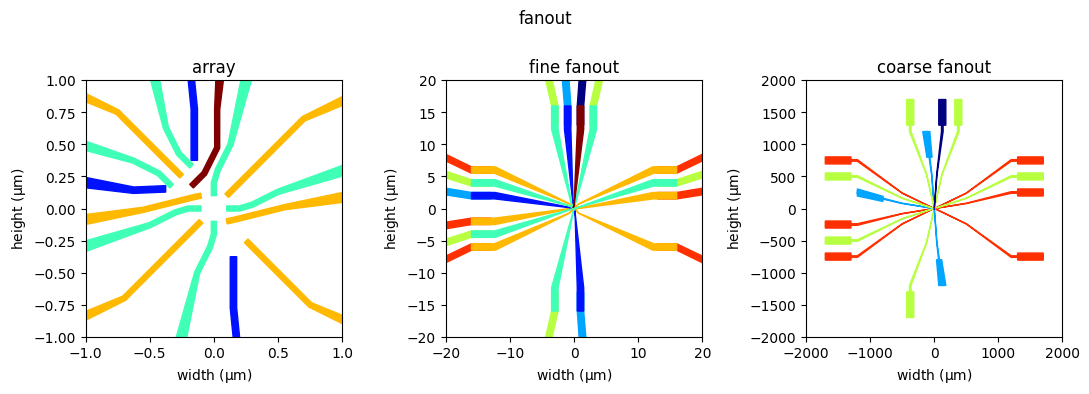

In [67]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [68]:
# %%%% Fanout sensor drain bottom
fo_sens_bottom_drain = FanOutLine(
    'sensor_bottom_drain', 0, collection, fo_points)

fo_sens_bottom_drain.fo_direction = 'right'
fo_sens_bottom_drain.n_fanout = 4

fo_sens_bottom_drain.bp_ohmic_position = bp_ohmic_position
fo_sens_bottom_drain.bp_ohmic_width_out = bp_ohmic_width_out
fo_sens_bottom_drain.bp_ohmic_width_in = bp_ohmic_width_in
fo_sens_bottom_drain.bp_ohmic_length = bp_ohmic_length
fo_sens_bottom_drain.bp_ohmic_shift = bp_shift_bottom_drain

points = mirror(fo_sens_top_drain.fo_line_fine.points_along_path)
fo_sens_bottom_drain.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_drain)

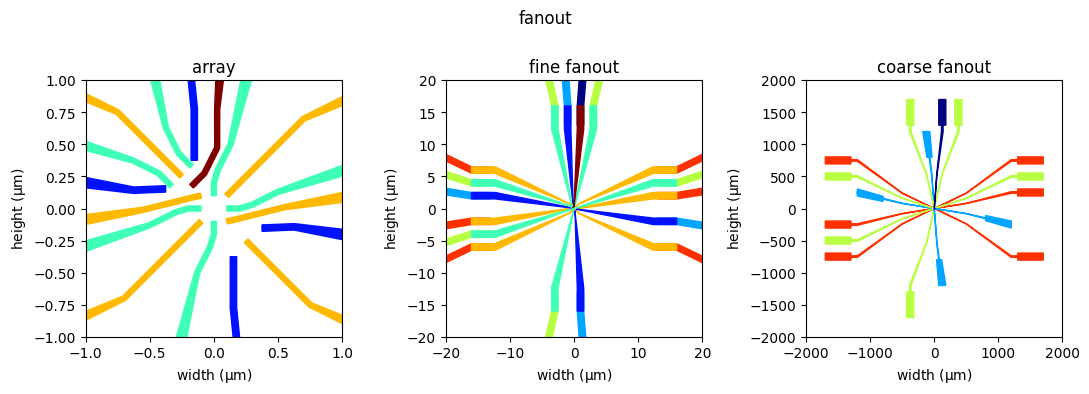

In [69]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [70]:
# %%%% Fanout sensor source barrier bottom
fo_sens_bottom_bar_source = FanOutLine(
    'sensor_bottom_barrier_source', 0, collection, fo_points)

fo_sens_bottom_bar_source.fo_direction = 'bottom'
fo_sens_bottom_bar_source.n_fanout = 4

points = mirror(fo_sens_top_bar_source.fo_line_fine.points_along_path)
fo_sens_bottom_bar_source.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_source)

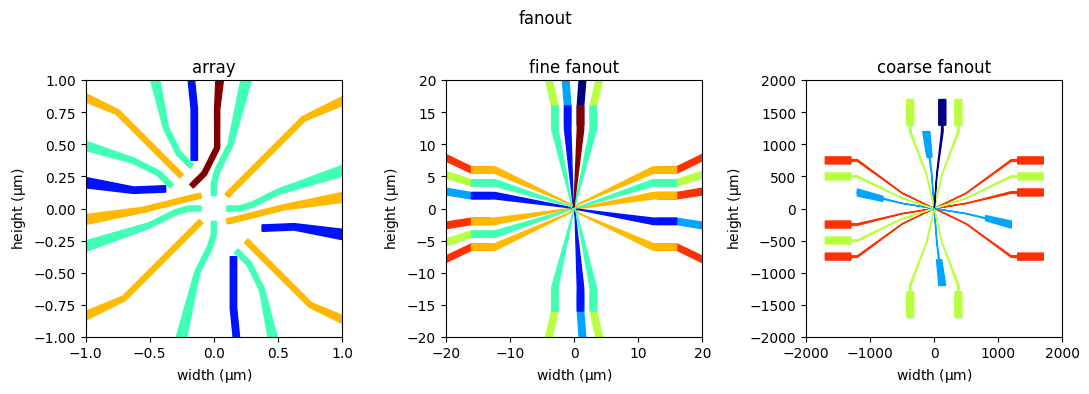

In [71]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [72]:
# %%%% Fanout sensor drain barrier bottom
fo_sens_bottom_bar_drain = FanOutLine(
    'sensor_bottom_barrier_drain', 0, collection, fo_points)

fo_sens_bottom_bar_drain.fo_direction = 'right'
fo_sens_bottom_bar_drain.n_fanout = 5

points = mirror(fo_sens_top_bar_drain.fo_line_fine.points_along_path)
fo_sens_bottom_bar_drain.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_drain)

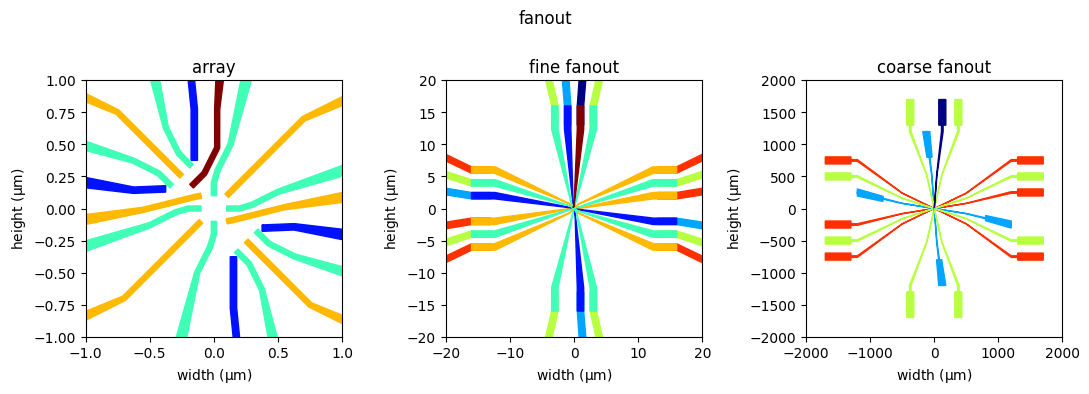

In [73]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [74]:
# %%%% Fanout sensor sep barrier bottom
fo_sens_bottom_bar_sep = FanOutLine(
    'sensor_bottom_barrier_seperation', 0, collection, fo_points)

fo_sens_bottom_bar_sep.fo_direction = 'bottom'
fo_sens_bottom_bar_sep.n_fanout = 2

points = mirror(fo_sens_top_bar_sep.fo_line_fine.points_along_path)
fo_sens_bottom_bar_sep.fo_line_fine.points_along_path = points

fo.add_component(fo_sens_bottom_bar_sep)

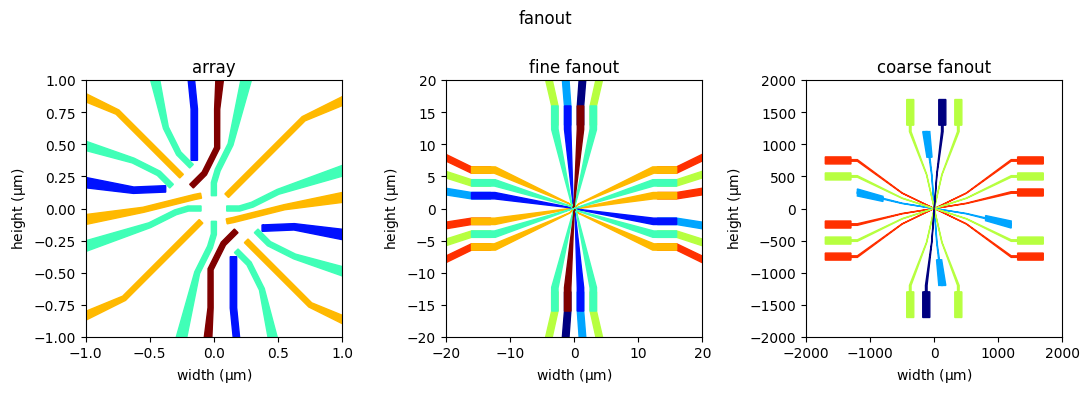

In [75]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

## Screening gates

In [76]:
# %%%% Plunger 0 screening
screen_pl_0 = ScreeningGate('screening_gate_pl_0', collection)

screen_pl_0.screen('plunger', 0,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_pl_0.layer = screening_layer
screen_pl_0.fo_contact_width = 50e-3
screen_pl_0.fo_contact_direction = 1

screen_pl_0_qda = qda.add_component()
screen_pl_0_qda.component = screen_pl_0

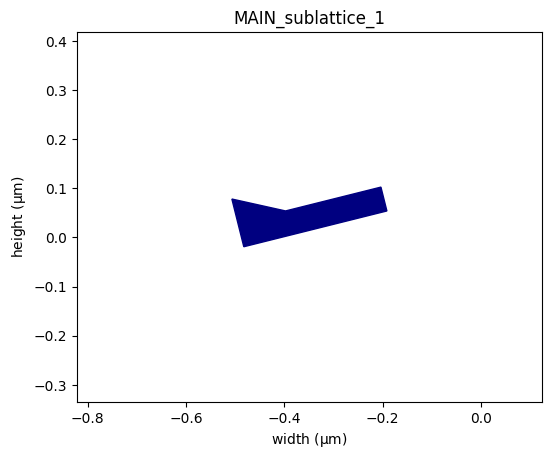

In [77]:
screen_pl_0_qda.build()
screen_pl_0_qda.plot()

In [78]:
# %%%% Plunger 1 screening
screen_pl_1 = ScreeningGate('screening_gate_pl_1', collection)

screen_pl_1.screen('plunger', 1,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (75e-3, 25e-3)])
screen_pl_1.layer = screening_layer
screen_pl_1.fo_contact_width = 50e-3
screen_pl_1.fo_contact_direction = 0

screen_pl_1_qda = qda.add_component()
screen_pl_1_qda.component = screen_pl_1

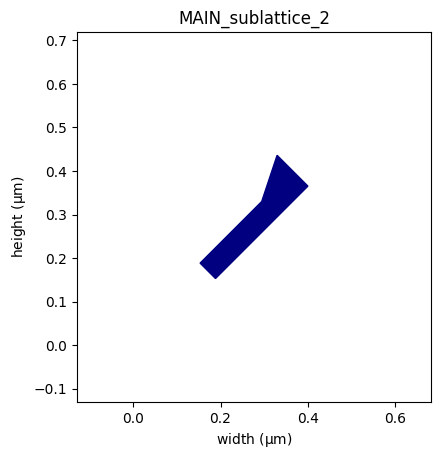

In [79]:
screen_pl_1_qda.build()
screen_pl_1_qda.plot()

In [80]:
# %%%% Plunger 2 screening
screen_pl_2 = ScreeningGate('screening_gate_pl_2', collection)

screen_pl_2.screen('plunger', 2,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (75e-3, 25e-3)])
screen_pl_2.layer = screening_layer
screen_pl_2.fo_contact_width = 50e-3
screen_pl_2.fo_contact_direction = 0

screen_pl_2_qda = qda.add_component()
screen_pl_2_qda.component = screen_pl_2

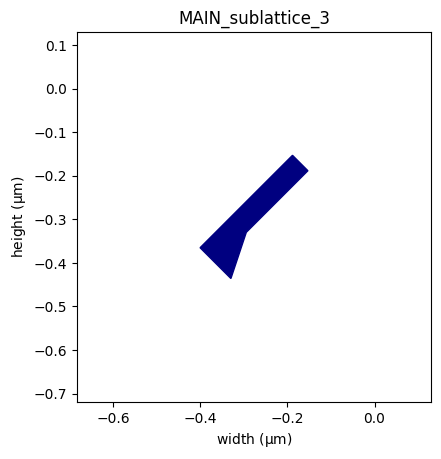

In [81]:
screen_pl_2_qda.build()
screen_pl_2_qda.plot()

In [82]:
# %%%% Plunger 3 screening
screen_pl_3 = ScreeningGate('screening_gate_pl_3', collection)

screen_pl_3.screen('plunger', 3,
                   [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_pl_3.layer = screening_layer
screen_pl_3.fo_contact_width = 50e-3
screen_pl_3.fo_contact_direction = 1

screen_pl_3_qda = qda.add_component()
screen_pl_3_qda.component = screen_pl_3

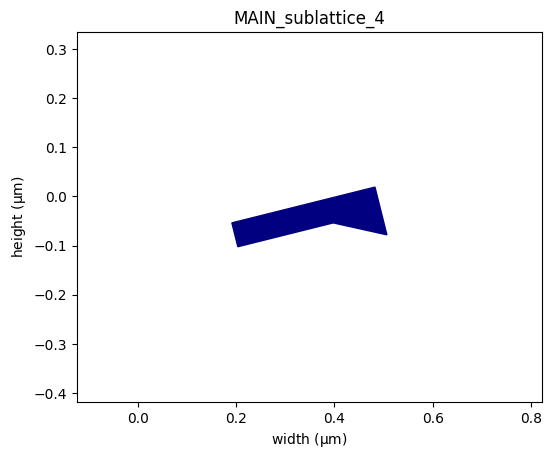

In [83]:
screen_pl_3_qda.build()
screen_pl_3_qda.plot()

In [84]:
# %%%% Plunger sens top plunger screening
screen_sens_pl_top = ScreeningGate('screening_gate_sens_pl_top',
                                   collection)

screen_sens_pl_top.screen('sensor_top_plunger', 0,
                          [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_sens_pl_top.layer = screening_layer
screen_sens_pl_top.fo_contact_width = 50e-3
screen_sens_pl_top.fo_contact_direction = 1

screen_sens_pl_top_qda = qda.add_component()
screen_sens_pl_top_qda.component = screen_sens_pl_top

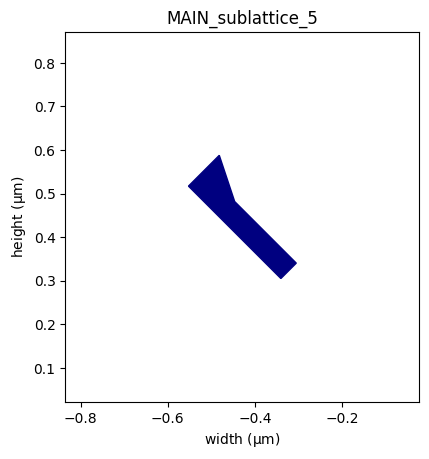

In [85]:
screen_sens_pl_top_qda.build()
screen_sens_pl_top_qda.plot()

In [86]:
# %%%% Plunger sens bottom plunger screening
screen_sens_pl_bottom = ScreeningGate('screening_gate_sens_pl_bottom',
                                      collection)

screen_sens_pl_bottom.screen('sensor_bottom_plunger', 0,
                             [0.1, 0.3, 0.4], [50e-3, 50e-3, (25e-3, 75e-3)])
screen_sens_pl_bottom.layer = screening_layer
screen_sens_pl_bottom.fo_contact_width = 50e-3
screen_sens_pl_bottom.fo_contact_direction = 1

screen_sens_pl_bottom_qda = qda.add_component()
screen_sens_pl_bottom_qda.component = screen_sens_pl_bottom

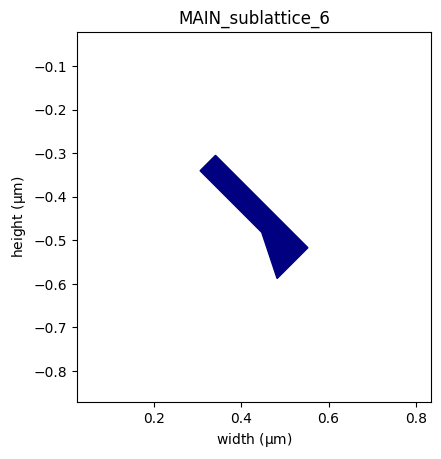

In [87]:
screen_sens_pl_bottom_qda .build()
screen_sens_pl_bottom_qda .plot()

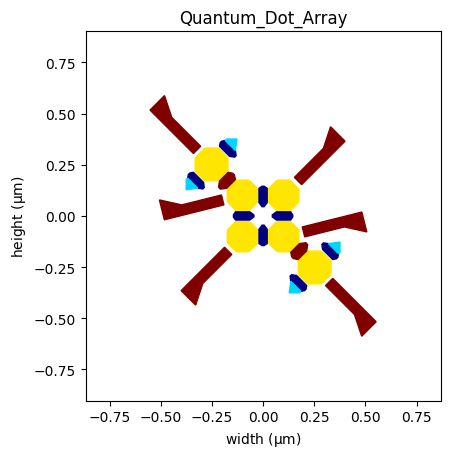

In [88]:
# %% Fanout screening 

qda.build()
qda.plot()

## Screening fanout

In [89]:
# %%%% Fanout screening plunger 0

fo_screen_pl_0 = FanOutLine('screening_gate_pl_0', 0, collection, fo_points)

fo_screen_pl_0.fo_direction = 'left'
fo_screen_pl_0.n_fanout = 3

fo_screen_pl_0.fo_line_fine.fo_width_start = screen_pl_0.fo_contact_width
fo_screen_pl_0.fo_line_fine.points_along_path = [[-0.1, 0, 'start'],
                                                 [-0.8, 0.01, 'start'],
                                                 ]

fo.add_component(fo_screen_pl_0)

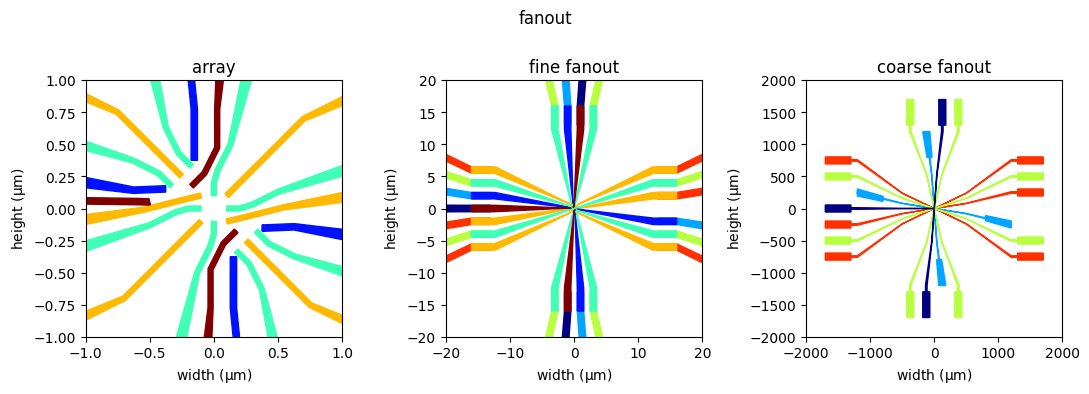

In [90]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [91]:
# %%%% Fanout screening plunger 1

fo_screen_pl_1 = FanOutLine(
    'screening_gate_pl_1', 0, collection, fo_points)

fo_screen_pl_1.fo_direction = 'top'
fo_screen_pl_1.n_fanout = -1

fo_screen_pl_1.fo_line_fine.fo_width_start = screen_pl_1.fo_contact_width
fo_screen_pl_1.fo_line_fine.points_along_path = [[0.05, 0.1, 'start'],
                                                 [0.1, 0.3, 'start'],
                                                 ]

fo.add_component(fo_screen_pl_1)

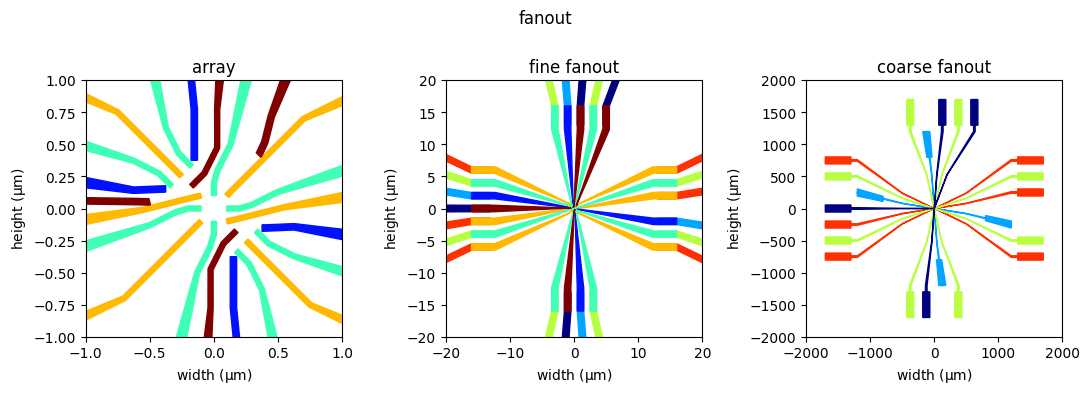

In [92]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [93]:
# %%%% Fanout screening plunger 2

fo_screen_pl_2 = FanOutLine(
    'screening_gate_pl_2', 0, collection, fo_points)

fo_screen_pl_2.fo_direction = 'bottom'
fo_screen_pl_2.n_fanout = 0

fo_screen_pl_2.fo_line_fine.fo_width_start = screen_pl_2.fo_contact_width
points = mirror(fo_screen_pl_1.fo_line_fine.points_along_path)
fo_screen_pl_2.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_pl_2)

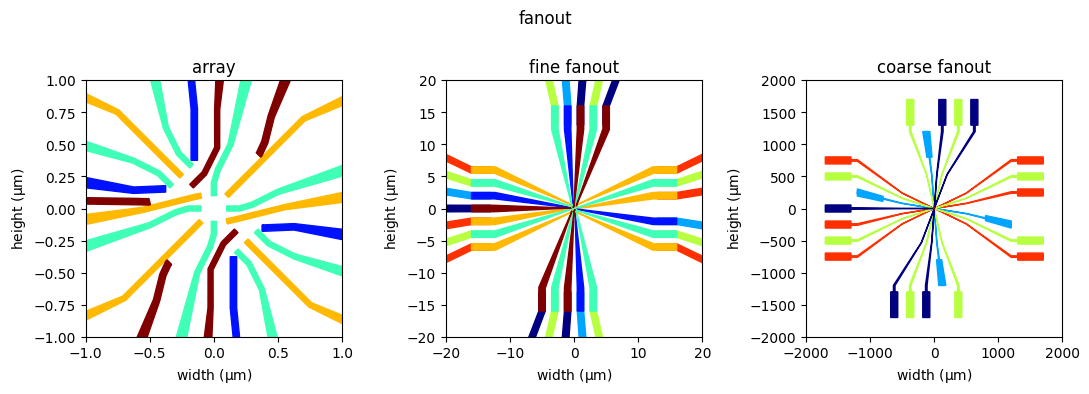

In [94]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [95]:
# %%%% Fanout screening plunger 3

fo_screen_pl_3 = FanOutLine(
    'screening_gate_pl_3', 0, collection, fo_points)

fo_screen_pl_3.fo_direction = 'right'
fo_screen_pl_3.n_fanout = 3

fo_screen_pl_3.fo_line_fine.fo_width_start = screen_pl_3.fo_contact_width
points = mirror(fo_screen_pl_0.fo_line_fine.points_along_path)
fo_screen_pl_3.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_pl_3)

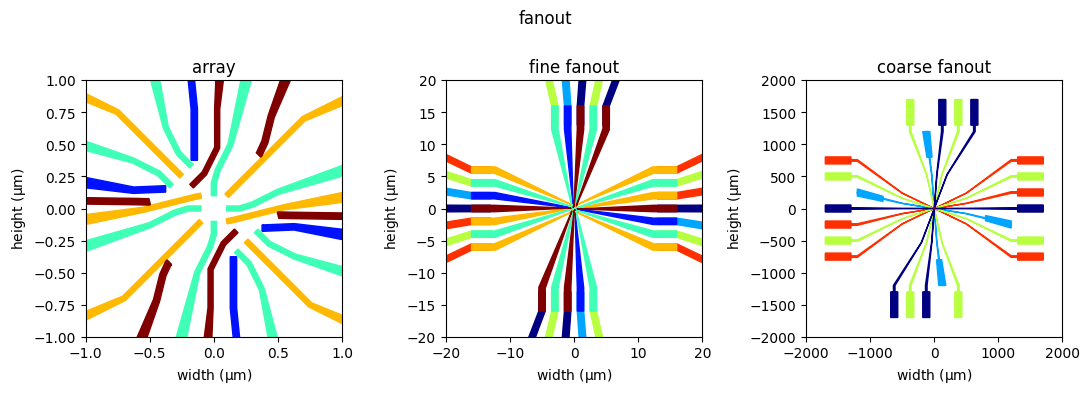

In [96]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [97]:
# %%%% Fanout screening plunger sensor top

fo_screen_sens_pl_top = FanOutLine(
    'screening_gate_sens_pl_top', 0, collection, fo_points)

fo_screen_sens_pl_top.fo_direction = 'top'
fo_screen_sens_pl_top.n_fanout = 0

fo_screen_sens_pl_top.fo_line_fine.fo_width_start = screen_sens_pl_top.fo_contact_width
fo_screen_sens_pl_top.fo_line_fine.points_along_path = [[-0.05, 0.1, 'start'],
                                                        [-0.2, 0.4, 'start'],
                                                        ]

fo.add_component(fo_screen_sens_pl_top)

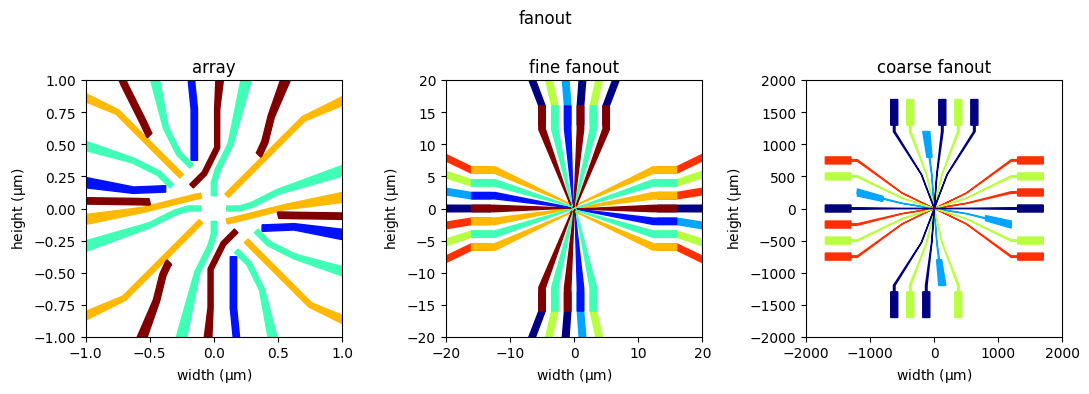

In [98]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

In [99]:
# %%%% Fanout screening plunger sensor bottom

fo_screen_sens_pl_bottom = FanOutLine(
    'screening_gate_sens_pl_bottom', 0, collection, fo_points)

fo_screen_sens_pl_bottom.fo_direction = 'bottom'
fo_screen_sens_pl_bottom.n_fanout = -1

fo_screen_sens_pl_bottom.fo_line_fine.fo_width_start = screen_sens_pl_bottom.fo_contact_width
points = mirror(fo_screen_sens_pl_top.fo_line_fine.points_along_path)
fo_screen_sens_pl_bottom.fo_line_fine.points_along_path = points

fo.add_component(fo_screen_sens_pl_bottom)

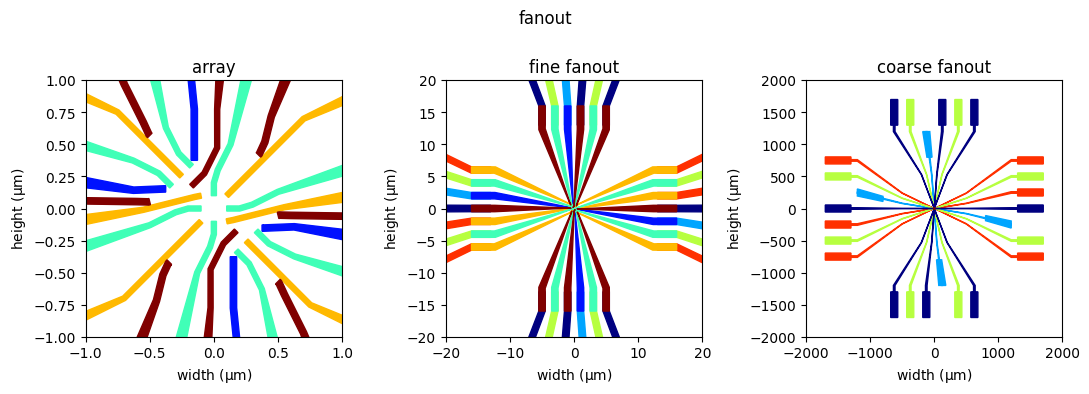

In [100]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

## Main cell with fanout

In [101]:
# %% Main cell with fanout

fo_qda = qda.add_component()
fo_qda.component = fo

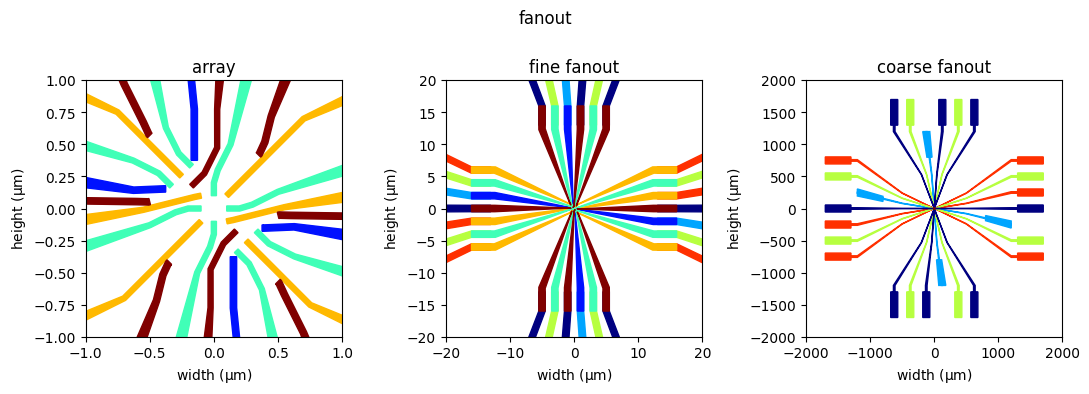

In [102]:
fo.build()

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

fo.plot(axs[0])
fo.plot(axs[1])
fo.plot(axs[2])

axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(fo.name)

plt.tight_layout()

## Build array

In [103]:
# %% Build array

qda.build()

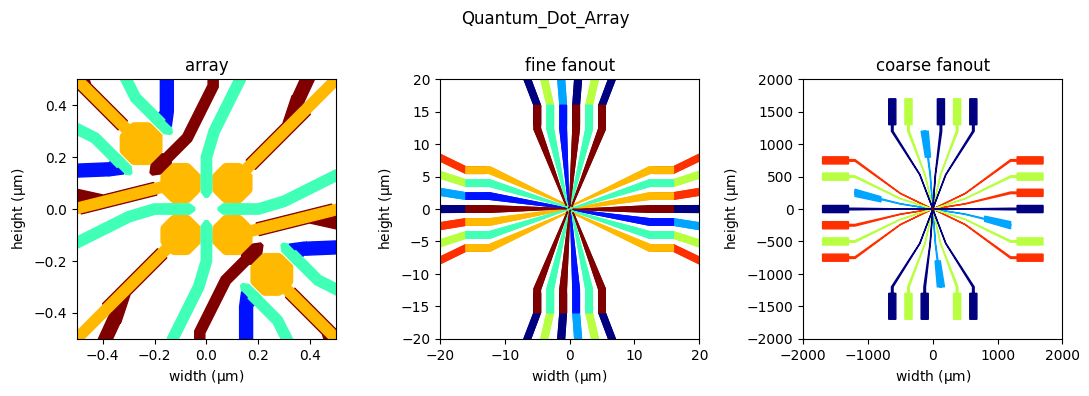

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(11, 4))

qda.plot(axs[0])
qda.plot(axs[1])
qda.plot(axs[1])
qda.plot(axs[2])

axs[0].set_xlim(-0.5, 0.5)
axs[0].set_ylim(-0.5, 0.5)

axs[1].set_xlim(-20, 20)
axs[1].set_ylim(-20, 20)

axs[2].set_xlim(-2000, 2000)
axs[2].set_ylim(-2000, 2000)

axs[0].set_title('array')
axs[1].set_title('fine fanout')
axs[2].set_title('coarse fanout')

fig.suptitle(qda.name)

plt.tight_layout()

## Save file

We can also add a chip layout file on top of the device, to see whether our fanout and bondpads are aligned with the prefab.

In [105]:
layout_path = "..\example_notebooks\layout_files\chip_layout.gds"
layout = qda.add_chip_layout(layout_path)

qda.save_as_gds('..\example_notebooks\example_2x2_device.gds')